In [ ]:
# Data Preparation Notebook

## Objectives
- Clean the data by removing outliers
- Handle any data quality issues  
- Create new features to improve predictions
- Prepare data for machine learning

## Inputs
- Raw data from inputs/datasets/collection/uk_housing_small.csv

## Outputs
- Cleaned dataset ready for modeling
- New engineered features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for nice plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Load the small dataset we created
df = pd.read_csv('../inputs/datasets/collection/uk_housing_small.csv')
print(f"Loaded {len(df)} properties")
print(f"Columns: {df.columns.tolist()}")

Loaded 20000 properties
Columns: ['Transaction unique identifier', 'Price', 'Date of Transfer', 'Property Type', 'Old/New', 'Duration', 'Town/City', 'District', 'County', 'PPDCategory Type', 'Record Status - monthly file only']


In [3]:
df.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{6146E264-E0D9-4C53-ACC8-48DB3954F80B},95200,2007-11-23 00:00,F,Y,L,SWINDON,SWINDON,SWINDON,A,A
1,{26EBD75A-D90F-411C-85E5-4D56F0F66484},199950,2013-06-28 00:00,S,Y,F,BINGLEY,BRADFORD,WEST YORKSHIRE,A,A
2,{E700C723-9426-4924-8D3F-1730EC3B2BCC},132000,2001-06-26 00:00,S,N,F,BRIGHTON,BRIGHTON AND HOVE,BRIGHTON AND HOVE,A,A
3,{677E0E46-8E8F-4560-AD93-07F72D5AE6D5},60000,1997-10-31 00:00,S,N,F,CAERPHILLY,CAERPHILLY,CAERPHILLY,A,A
4,{E2387F76-24EC-4A7E-8A27-220E500F0DC2},87000,1998-02-23 00:00,S,N,F,BEXLEYHEATH,BEXLEY,GREATER LONDON,A,A


In [4]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0])

if missing.sum() == 0:
    print("\nNo missing values found - data is complete!")
else:
    print(f"\nTotal missing values: {missing.sum()}")

Missing values per column:
Series([], dtype: int64)

No missing values found - data is complete!


In [5]:
# If there were missing values, we would handle them here
# For example:
# df = df.dropna()  # Remove rows with missing values
# or
# df['column'].fillna(df['column'].median(), inplace=True)  # Fill with median

print("No missing values to handle")

No missing values to handle


In [6]:
# Look at price distribution
print("Price Statistics Before Cleaning:")
print(df['Price'].describe())

Price Statistics Before Cleaning:
count    2.000000e+04
mean     1.805406e+05
std      4.217152e+05
min      1.750000e+03
25%      7.600000e+04
50%      1.300000e+05
75%      2.100000e+05
max      4.000000e+07
Name: Price, dtype: float64


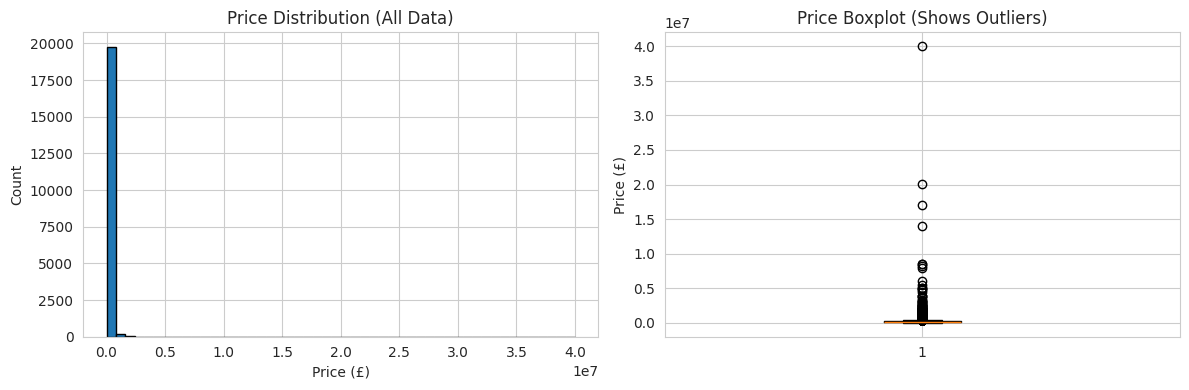

In [7]:
# Plot price distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['Price'], bins=50, edgecolor='black')
plt.title('Price Distribution (All Data)')
plt.xlabel('Price (£)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.boxplot(df['Price'])
plt.title('Price Boxplot (Shows Outliers)')
plt.ylabel('Price (£)')

plt.tight_layout()
plt.show()